In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [135]:
# Load housing data
# Dataset is from house sales in King County, the region where the city of Seattle, WA is located.
sales = pd.read_csv('home_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


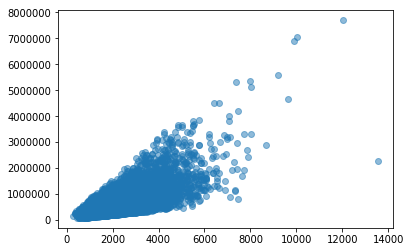

In [136]:
# plot square living versus price
plt.scatter(sales['sqft_living'], sales['price'], alpha=0.5)

In [137]:
# prepare data
features = ['sqft_living']
target = ['price']
X = sales[features]
y = sales[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [138]:
# prepare linear regression model
linreg = LinearRegression().fit(X_train, y_train['price'])

In [139]:
# evaluate model
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
      .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
      .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 283.96855737]
linear model intercept (b): -48257.063
R-squared score (training): 0.496
R-squared score (test): 0.479


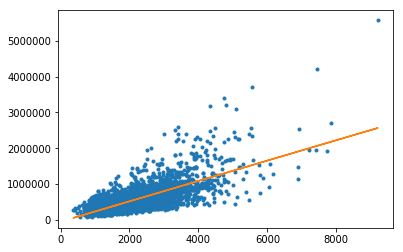

In [140]:
# plot model
plt.plot(test_X['sqft_living'],test_Y['price'],'.',
        test_X['sqft_living'],linreg.predict(test_X),'-')

In [141]:
# predict single house
house1 = sales[sales['id'] == 5309101200][features]
linreg.predict(house1)

array([ 633267.47422744])

In [142]:
# preparing more features for the second model
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
target = ['price']
X1 = sales[my_features]
y1 = sales[target]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [143]:
my_fetaures_linreg = LinearRegression().fit(X1_train, y1_train['price'])

In [144]:
# evaluate model
print('linear model coeff (w): {}'
     .format(my_fetaures_linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(my_fetaures_linreg.intercept_))
print('R-squared score (training): {:.3f}'
      .format(my_fetaures_linreg.score(X1_train, y1_train)))
print('R-squared score (test): {:.3f}'
      .format(my_fetaures_linreg.score(X1_test, y1_test)))

linear model coeff (w): [ -5.66006330e+04   1.10870936e+04   3.20408369e+02  -2.89499140e-01
  -2.41800491e+03   6.17971071e+02]
linear model intercept (b): -60558259.018
R-squared score (training): 0.518
R-squared score (test): 0.499


In [102]:
# predict gates' house price
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

my_fetaures_linreg.predict(pd.DataFrame(bill_gates)[my_features])

array([ 15796988.23574052])

In [108]:
# find the pricest zipcode
sales.groupby(['zipcode'], as_index=False).mean().sort_values(by='price', ascending=False).head()
houses_in_pricest_area = sales[sales['zipcode']==98039]
houses_in_pricest_area['price'].mean()
# zipcode = 98039 with average price 2.160607e+06

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
24,98039,3.755708e+09,2.160607e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.020000,0.440000,3.480000,9.560000,3290.900000,510.000000,1972.520000,398.600000,47.625840,-122.233540,3132.200000,17291.100000
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
25,98040,4.199323e+09,1.194230e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.042553,0.783688,3.787234,8.960993,2474.329787,632.503546,1971.471631,233.574468,47.559846,-122.225592,2898.744681,12801.283688
48,98112,4.826282e+09,1.095499e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,0.148699,3.516729,8.442379,2005.695167,493.048327,1944.449814,223.144981,47.629619,-122.297866,2280.078067,4898.159851
41,98102,4.123034e+09,9.012582e+05,3.219048,2.261905,2159.742857,3616.190476,2.004762,0.000000,0.171429,3.371429,8.285714,1764.933333,394.809524,1952.523810,113.923810,47.634607,-122.322248,1958.333333,3310.133333


In [123]:
# first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.
filtered_houses_records = sales[(sales['sqft_living']>2000) & (sales['sqft_living'] <4000)]
print('fraction:' ,len(filtered_houses_records.index)/len(sales.index))

fraction: 0.4215518437977143


In [145]:
# comparing two models with root mean squared error
simple_predict = linreg.predict(X_test[features])
my_features_predict =  my_fetaures_linreg.predict(X1_test[my_features])

print("Root mean squared error for simple model: %.2f"
      % np.sqrt(mean_squared_error(y_test,simple_predict)))

print("Root mean squared error for more feature model: %.2f"
      % np.sqrt(mean_squared_error(y1_test,my_features_predict)))

Root mean squared error for simple model: 248879.06
Root mean squared error for more feature model: 244004.77
